# Wiring diagrams

In [1]:
using Catlab.Doctrines

## TikZ

Catlab can draw morphism expressions as TikZ pictures. This feature requires the [TikzPictures.jl](https://github.com/sisl/TikzPictures.jl) package.

In [2]:
import TikzPictures
using Catlab.Graphics

### Symmetric monoidal category

In [3]:
A, B = Ob(FreeSymmetricMonoidalCategory, :A, :B)
f = Hom(:f, A, B)
g = Hom(:g, B, A)
h = Hom(:h, otimes(A,B), otimes(A,B));

In [4]:
to_tikz(f; arrowtip="Stealth", labels=true)

In [5]:
to_tikz(compose(f,g); arrowtip="Stealth", labels=true)

In [6]:
comp1 = compose(otimes(g,f), h, otimes(f,g))

compose(otimes(g,f),h,otimes(f,g))

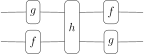

In [7]:
to_tikz(comp1)

In [8]:
comp2 = compose(otimes(id(A),f), h, otimes(id(A),g))

compose(otimes(id(A),f),h,otimes(id(A),g))

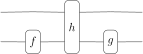

In [9]:
to_tikz(comp2)

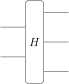

In [10]:
to_tikz(Hom(:H, otimes(A,A), otimes(B,B,B)))

In [11]:
twist = compose(braid(A,A), otimes(f,f), braid(B,B))

compose(braid(A,A),otimes(f,f),braid(B,B))

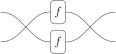

In [12]:
to_tikz(twist)

### Biproduct category

In [13]:
A, B = Ob(FreeBiproductCategory, :A, :B)
f = Hom(:f, A, B)
g = Hom(:g, B, A);

In [14]:
split = compose(mcopy(A), otimes(f,f))

compose(mcopy(A),otimes(f,f))

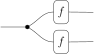

In [15]:
to_tikz(split)

In [16]:
combine = compose(split, mmerge(B))

compose(mcopy(A),otimes(f,f),mmerge(B))

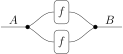

In [17]:
to_tikz(combine, labels=true)

In [18]:
to_tikz(compose(create(A), f, g, delete(A)))

### Compact closed category 

In [19]:
A, B = Ob(FreeCompactClosedCategory, :A, :B)
f = Hom(:f, A, B)
g = Hom(:g, B, A)
h = Hom(:h, otimes(A,B), otimes(A,B));

In [20]:
to_tikz(dcounit(A); arrowtip="Stealth", labels=true)

In [21]:
to_tikz(dunit(A); arrowtip="Stealth", labels=true)

In [22]:
transpose = compose(
    otimes(dunit(A), id(dual(B))),
    otimes(id(dual(A)), f, id(dual(B))),
    otimes(id(dual(A)), dcounit(B)),
)

compose(otimes(dunit(A),id(dual(B))),otimes(id(dual(A)),f,id(dual(B))),otimes(id(dual(A)),dcounit(B)))

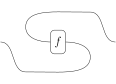

In [23]:
to_tikz(transpose)

In [24]:
trace = compose(
    f,
    otimes(dunit(A), id(B)),
    otimes(id(dual(A)), h),
    otimes(braid(dual(A),A), id(B)),
    otimes(dcounit(A), id(B)),
    g
)

compose(f,otimes(dunit(A),id(B)),otimes(id(dual(A)),h),otimes(braid(dual(A),A),id(B)),otimes(dcounit(A),id(B)),g)

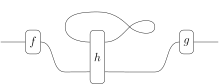

In [25]:
to_tikz(trace)

## Graphviz

Catlab can also draw wiring diagrams using Graphviz's `dot` program. This feature requires that Graphviz be installed.

### Symmetric monoidal category

In [3]:
A, B = Ob(FreeSymmetricMonoidalCategory, :A, :B)
f = Hom(:f, A, B)
g = Hom(:g, B, A)
h = Hom(:h, otimes(A,B), otimes(A,B));

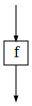

In [4]:
to_graphviz(f)

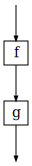

In [5]:
to_graphviz(compose(f,g))

Notice, in the next example, how the Graphviz wiring diagram automatically "untwists" the double braiding to minimize edge crossings. Compare with the TikZ picture above.

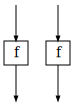

In [6]:
to_graphviz(compose(braid(A,A), otimes(f,f), braid(B,B)))

Here is a larger composite morphism.

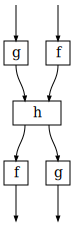

In [7]:
to_graphviz(compose(otimes(g,f), h, otimes(f,g)))

We can also tell Graphviz to lay out the diagrams in the horizontal (left-to-right) direction.

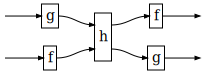

In [8]:
to_graphviz(compose(otimes(g,f), h, otimes(f,g)), direction=:horizontal)

### Biproduct category

In [9]:
A, B = Ob(FreeBiproductCategory, :A, :B)
f = Hom(:f, A, B)
g = Hom(:g, B, A);

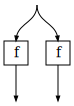

In [10]:
to_graphviz(compose(mcopy(A), otimes(f,f)))

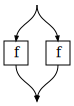

In [11]:
to_graphviz(compose(mcopy(A), otimes(f,f), mmerge(B)))